https://quantpie.co.uk/bsm_formula/bs_summary.php

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Black Scholes for Vanilla](#p1)

# [2. Greeks for Vanilla Calls](#p2)

# [3. Greeks for Vanilla Puts](#p3)

# [4. Initial Parameters](#p4)

# [5. Black-Scholes Price Chart](#p5)

# [6. Vanilla Call Greeks Chart](#p6)

# [7. Vanilla Put Greeks Chart](#p7)

In [1]:
import scipy as sc
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import warnings 

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# <a id = "p1">1.</a>  <font color = "green"> Black Scholes for Vanilla </font>  [back to table of contents](#top)

In [2]:
def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)

# <a id = "p2">2.</a>  <font color = "green"> Greeks for Vanilla Calls </font>  [back to table of contents](#top)

In [4]:
def delta_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return norm.cdf(d1)

In [5]:
def gamma_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = norm.pdf(d1)
    denominator = S * sigma * np.sqrt(T)
    return numerator / denominator

In [6]:
def vega_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.pdf(d1) * np.sqrt(T)

In [7]:
def theta_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = S * norm.pdf(d1) * sigma
    denominator = 2 * np.sqrt(T)
    return -1 * (numerator / denominator) - r * K * pow(np.exp(1), -1 * r * T) * norm.cdf(d2)

In [8]:
def rho_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K * T * pow(np.exp(1), -1 * r * T) * norm.cdf(d2)

In [9]:
def vanna_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return norm.pdf(d1) * d2 * np.sqrt(T) / sigma

In [10]:
def volga_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    vega = vega_call(S, K, r, sigma, T)
    return vega * d1 * d2 / sigma

In [11]:
def charm_call(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    term = 2 * r * T - d2 * sigma * np.sqrt(T)
    return -norm.pdf(d1) / (2 * T * sigma * np.sqrt(T)) * term

# <a id = "p3">3.</a>  <font color = "green"> Greeks for Vanilla Puts </font>  [back to table of contents](#top)

In [12]:
def delta_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return norm.cdf(d1) - 1

In [13]:
def gamma_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = norm.pdf(d1)
    denominator = S * sigma * np.sqrt(T)
    return numerator / denominator

In [14]:
def vega_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.pdf(d1) * np.sqrt(T)

In [15]:
def theta_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    numerator = S * norm.pdf(d1) * sigma
    denominator = 2 * np.sqrt(T)
    return -1 * (numerator / denominator) + r * K * pow(np.exp(1), -1 * r * T) * norm.cdf(-1 * d2)

In [16]:
def rho_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -1 * K * T * pow(np.exp(1), -1 * r * T) * norm.cdf(-1 * d2)

In [17]:
def vanna_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return norm.pdf(d1) * d2 * np.sqrt(T) / sigma

In [18]:
def volga_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    vega = vega_put(S, K, r, sigma, T)
    return vega * d1 * d2 / sigma

In [19]:
def charm_put(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    term = 2 * r * T + d2 * sigma * np.sqrt(T)
    return -norm.pdf(d1) / (2 * T * sigma * np.sqrt(T)) * term

# <a id = "p4">4.</a>  <font color = "green"> Initial Parameters </font>  [back to table of contents](#top)

In [20]:
S = np.arange(0, 200, 1)     # Underlying asset price
K=100                        # Option strike price
r=0.05                       # Risk-free interest rate
sigma=0.2                    # Volatility of the underlying asset
T=1                          # Time to expiration in years

# <a id = "p5">5.</a>  <font color = "green"> Black-Scholes Price Chart </font>  [back to table of contents](#top)

In [21]:
def BlackScholesPricing(model):

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    prices = [model(S, K, r, sigma, T) for S in S_range]

    line, = ax.plot(S_range, prices, linewidth=2, color='red')
    ax.set_xlim([0, 250])
    ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Value")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S0)

    rf_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    # dividend_yield_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    # dividend_yield_slider = Slider(dividend_yield_slider_ax, 'Dividend Yield', 0.00, 0.20, valinit=q)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)
    
    strike_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)
    
    time_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        # dividend_yield_current = dividend_yield_slider.val
        sigma_current = sigma_slider.val
        strike_current = strike_slider.val
        T_current = time_slider.val

        prices = [model(S, strike_current, rf_current, sigma_current,  T_current) for S in S_range]
        line.set_ydata(prices)
        ax.set_ylim([min(min(prices) * 0.9,min(prices) * 1.1), max(prices) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    # dividend_yield_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        # dividend_yield_slider.reset()
        sigma_slider.reset()
        strike_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

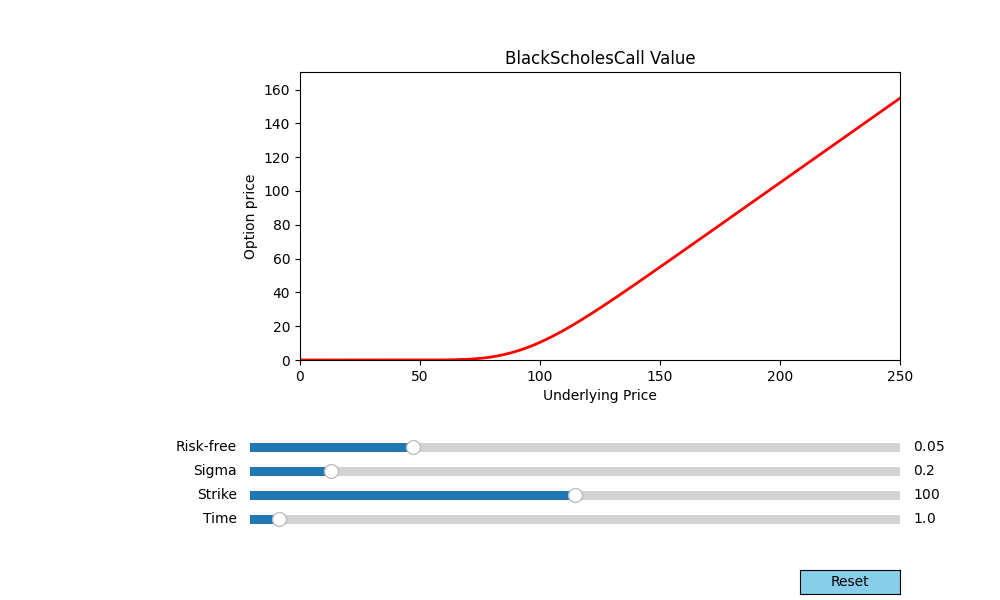

In [22]:
BlackScholesPricing(BlackScholesCall)

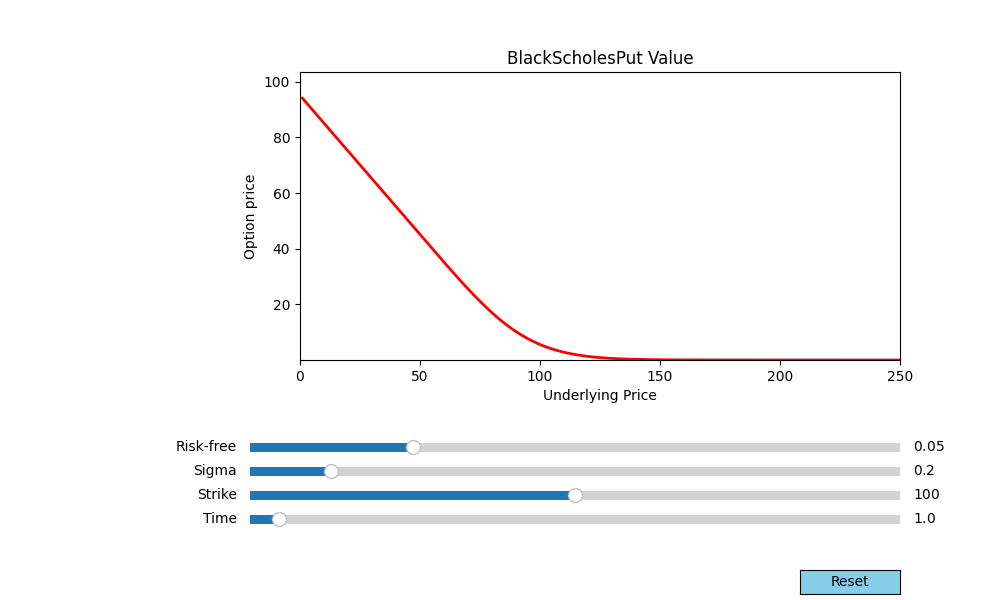

In [23]:
BlackScholesPricing(BlackScholesPut)

# <a id = "p6">6.</a>  <font color = "green"> Vanilla Call Greeks Chart </font>  [back to table of contents](#top)

In [24]:
def GreekSensitivity(model,greek):

    axis_color = 'skyblue'

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Define the range for S0
    S_range = np.linspace(1, 250, 250)
    greeks = [greek(S, K, r, sigma, T) for S in S_range]

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    line, = ax.plot(S_range, greeks, linewidth=2, color='red')
    ax.set_xlim([0, 250])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel(f"{greek.__name__}")
    ax.set_title(f"Change in {greek.__name__} for {model.__name__}")

    # Slider definitions
    #S_slider_ax = fig.add_axes([0.25, 0.30, 0.65, 0.03], facecolor=axis_color)
    #S_slider = Slider(S_slider_ax, 'Initial Stock Price', 50, 150, valinit=S0)

    rf_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.20, valinit=r)
    
    # dividend_yield_slider_ax = fig.add_axes([0.25, 0.24, 0.65, 0.03], facecolor=axis_color)
    # dividend_yield_slider = Slider(dividend_yield_slider_ax, 'Dividend Yield', 0.00, 0.20, valinit=q)
    
    sigma_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)
    
    strike_slider_ax = fig.add_axes([0.25, 0.16, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)
    
    time_slider_ax = fig.add_axes([0.25, 0.12, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)

    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        # dividend_yield_current = dividend_yield_slider.val
        sigma_current = sigma_slider.val
        strike_current = strike_slider.val
        T_current = time_slider.val

        greeks = [greek(S, strike_current, rf_current, sigma_current,  T_current) for S in S_range]
        line.set_ydata(greeks)
        ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    # dividend_yield_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Reset button
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        #S_slider.reset()
        rf_slider.reset()
        # dividend_yield_slider.reset()
        sigma_slider.reset()
        strike_slider.reset()
        time_slider.reset()

    reset_button.on_clicked(reset_button_on_clicked)

    plt.show()

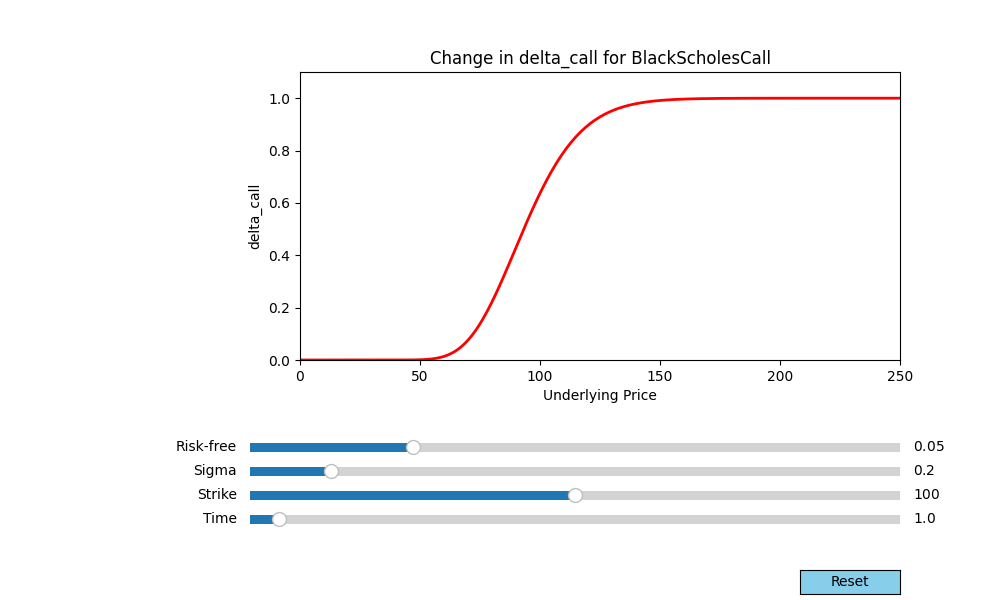

In [25]:
GreekSensitivity(model=BlackScholesCall,greek=delta_call)

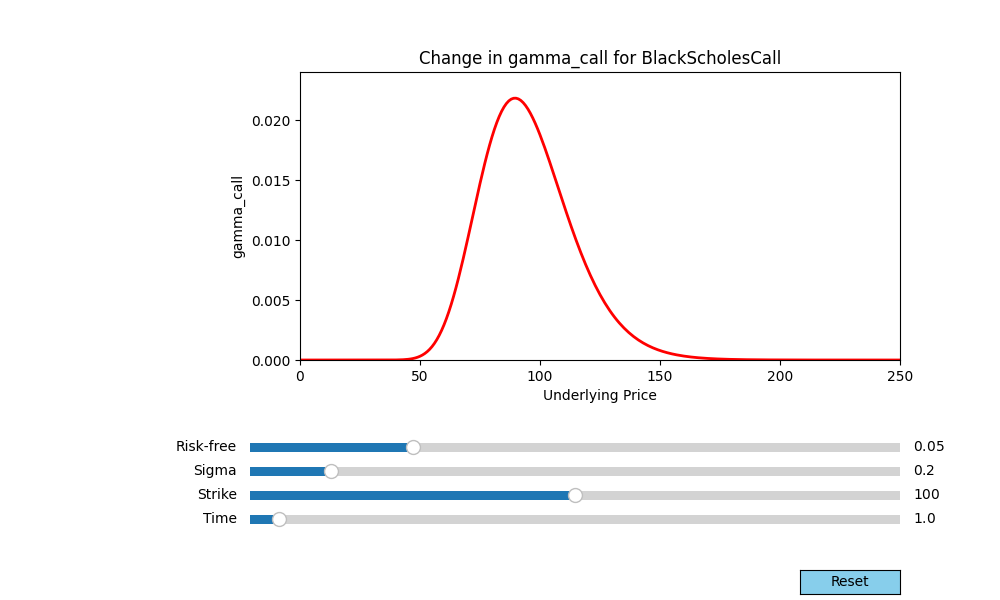

In [26]:
GreekSensitivity(model=BlackScholesCall,greek=gamma_call)

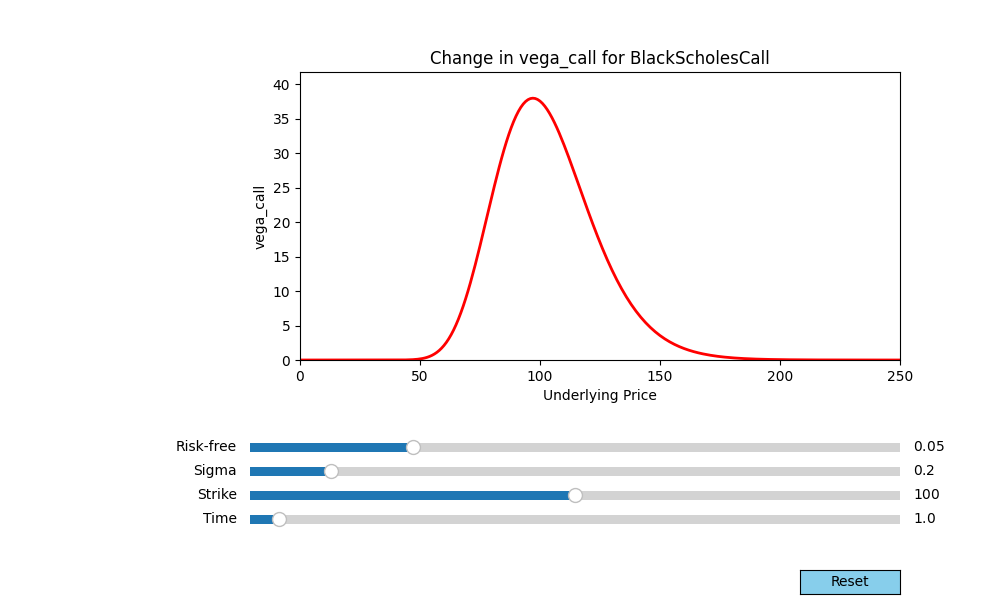

In [27]:
GreekSensitivity(model=BlackScholesCall,greek=vega_call)

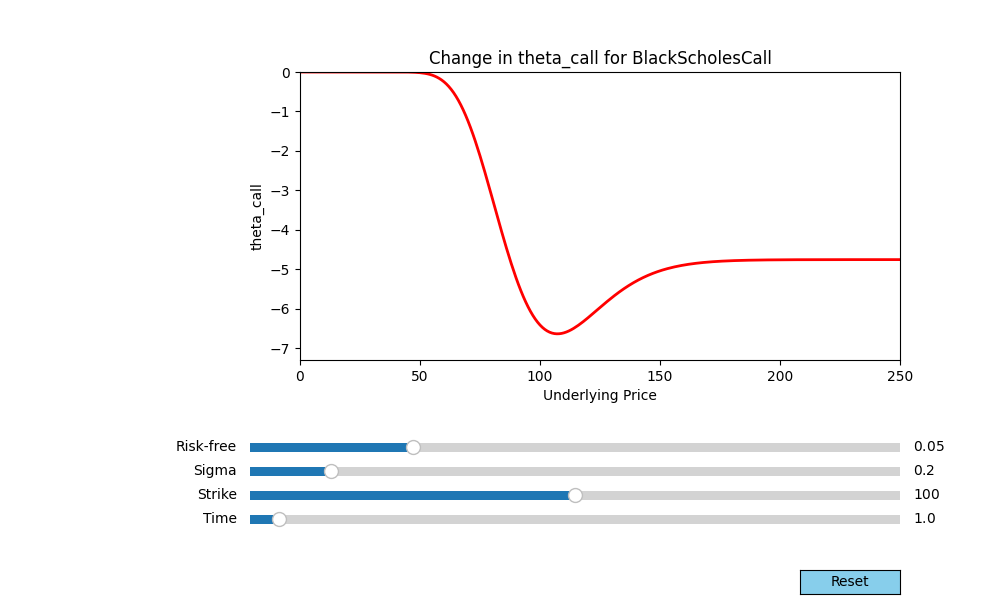

In [28]:
GreekSensitivity(model=BlackScholesCall,greek=theta_call)

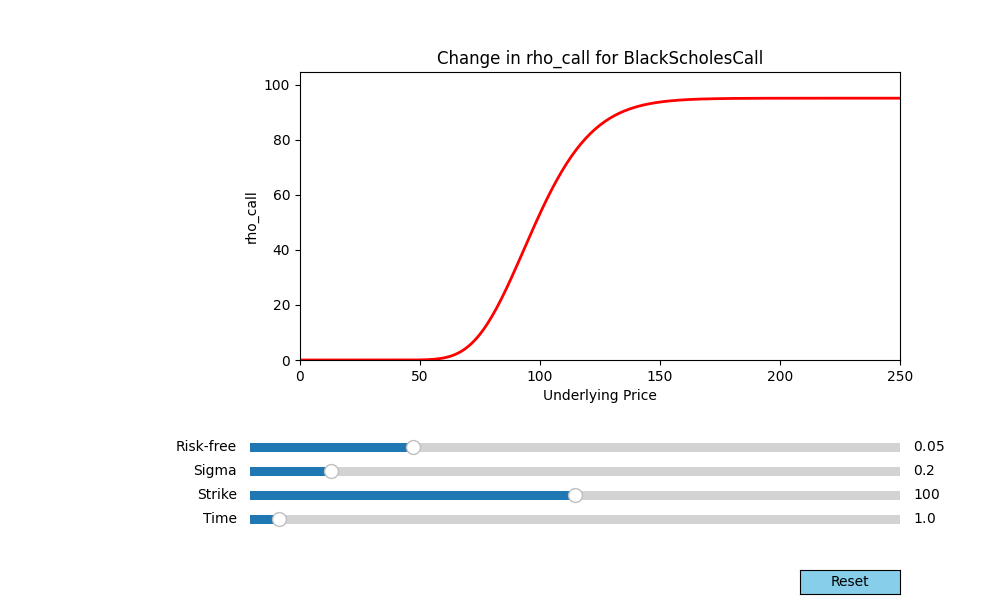

In [29]:
GreekSensitivity(model=BlackScholesCall,greek=rho_call)

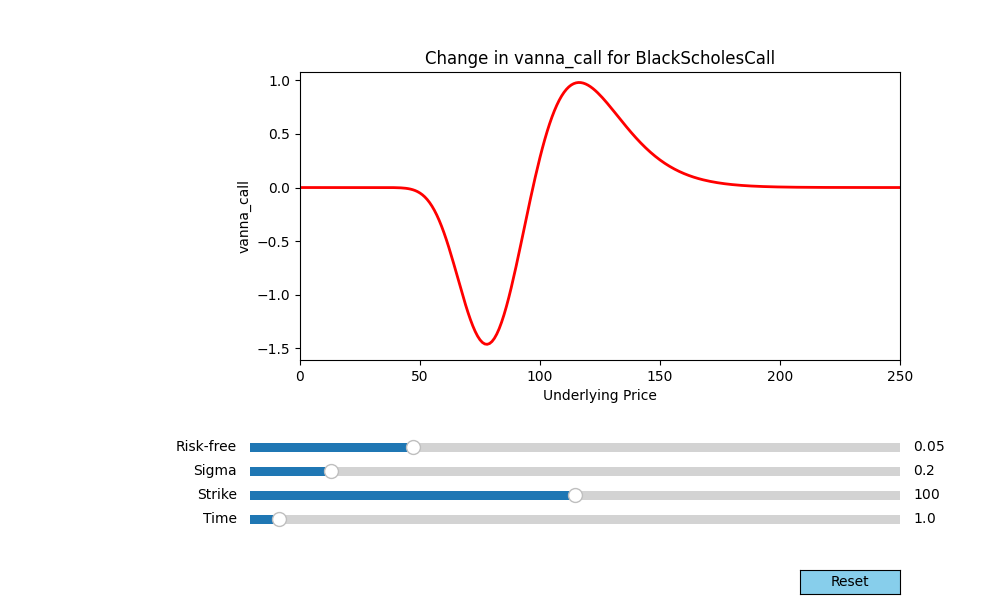

In [30]:
GreekSensitivity(model=BlackScholesCall,greek=vanna_call)

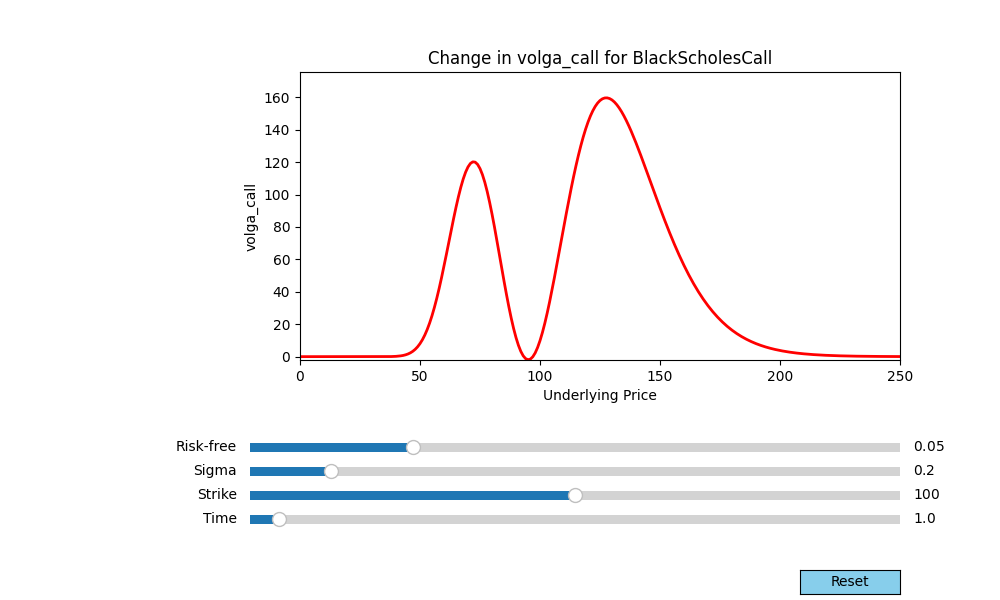

In [31]:
GreekSensitivity(model=BlackScholesCall,greek=volga_call)

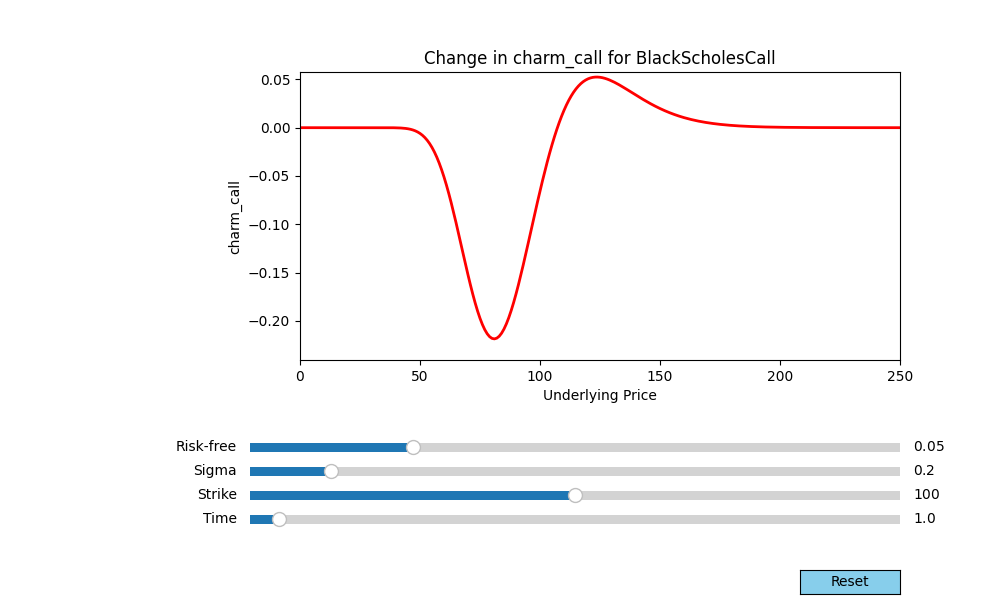

In [32]:
GreekSensitivity(model=BlackScholesCall,greek=charm_call)

# <a id = "p7">7.</a>  <font color = "green"> Vanilla Put Greeks Chart </font>  [back to table of contents](#top)

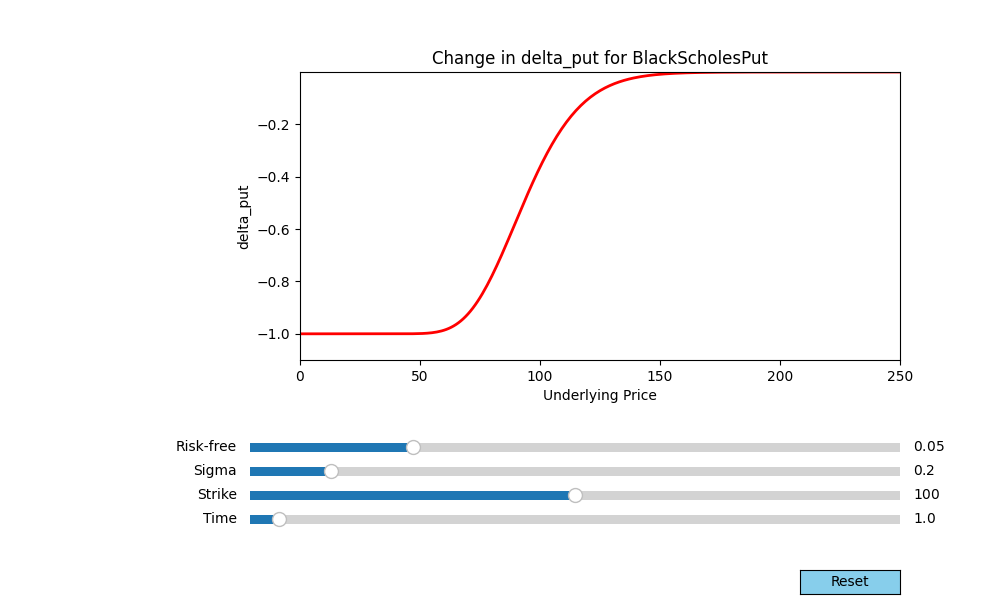

In [33]:
GreekSensitivity(model=BlackScholesPut,greek=delta_put)

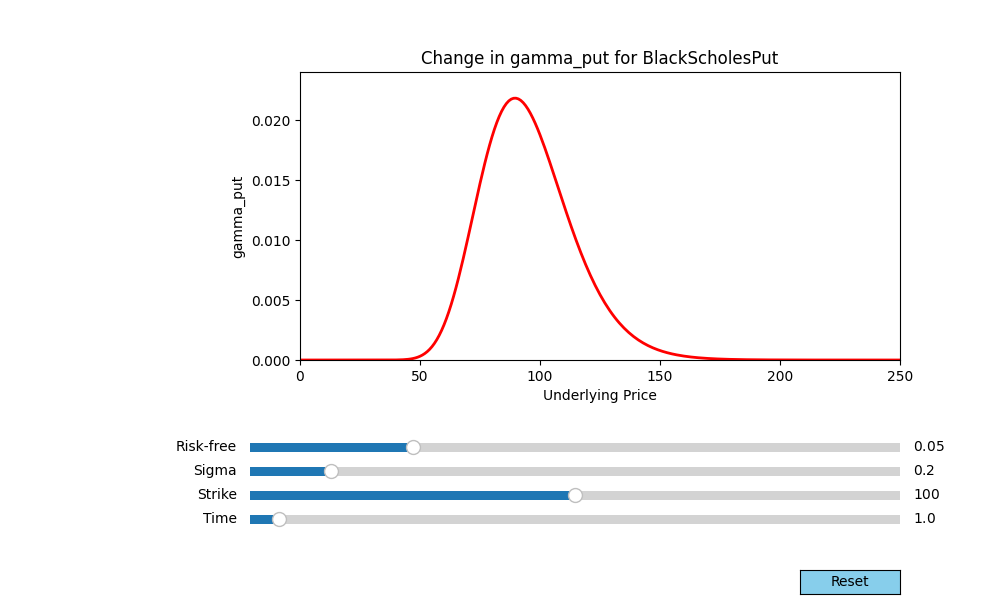

In [34]:
GreekSensitivity(model=BlackScholesPut,greek=gamma_put)

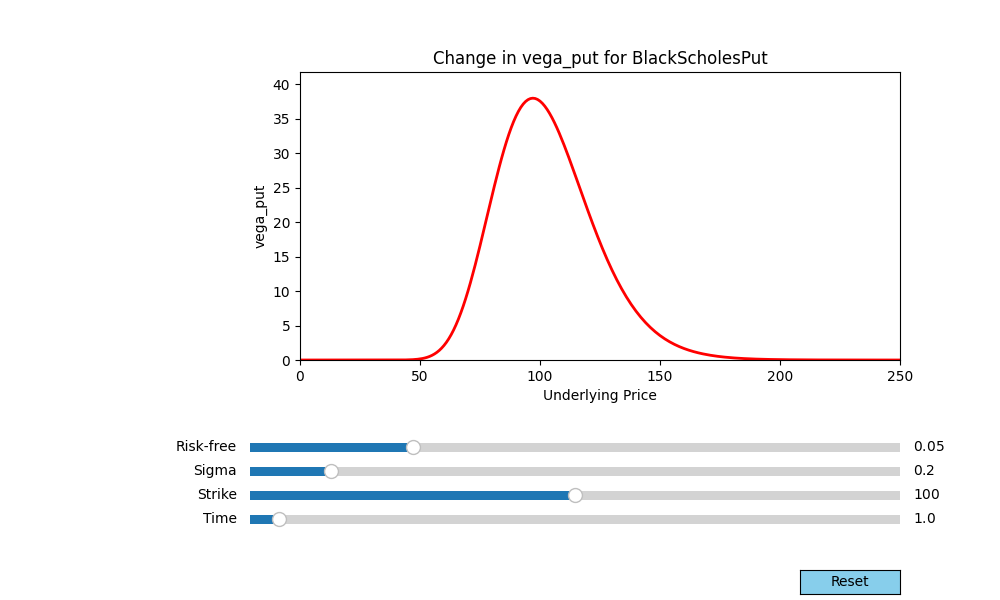

In [35]:
GreekSensitivity(model=BlackScholesPut,greek=vega_put)

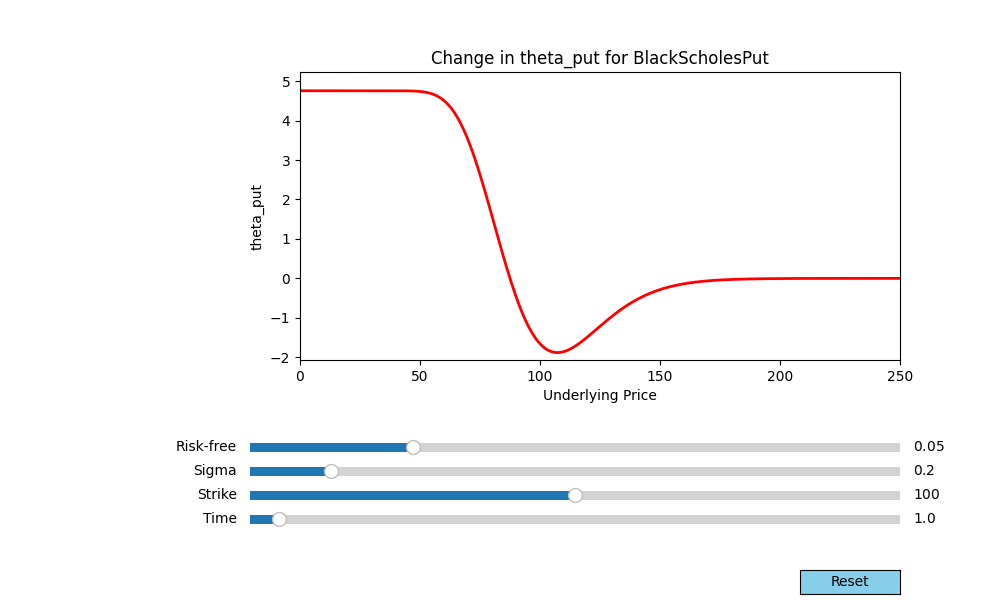

In [36]:
GreekSensitivity(model=BlackScholesPut,greek=theta_put)

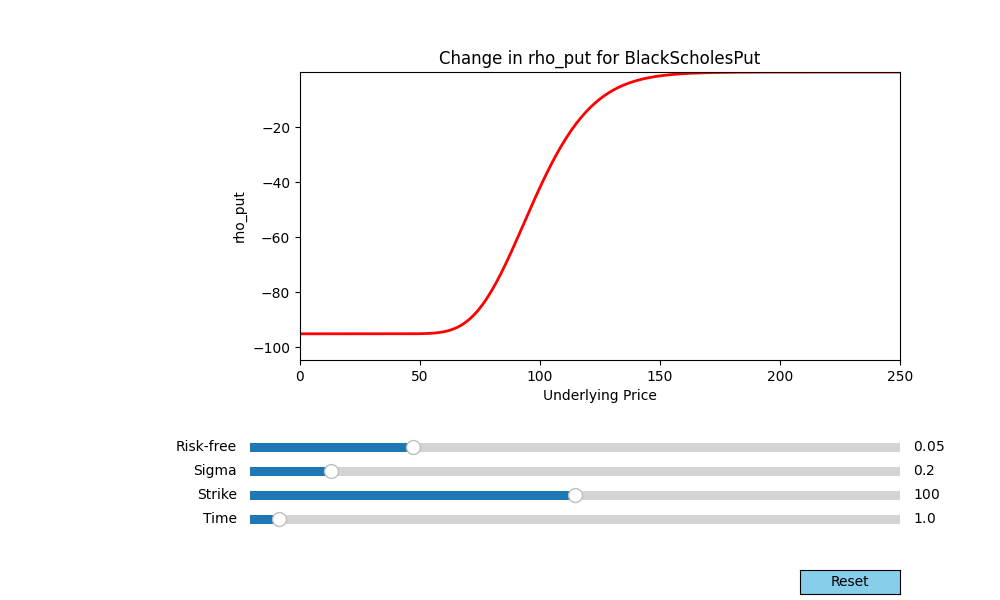

In [37]:
GreekSensitivity(model=BlackScholesPut,greek=rho_put)

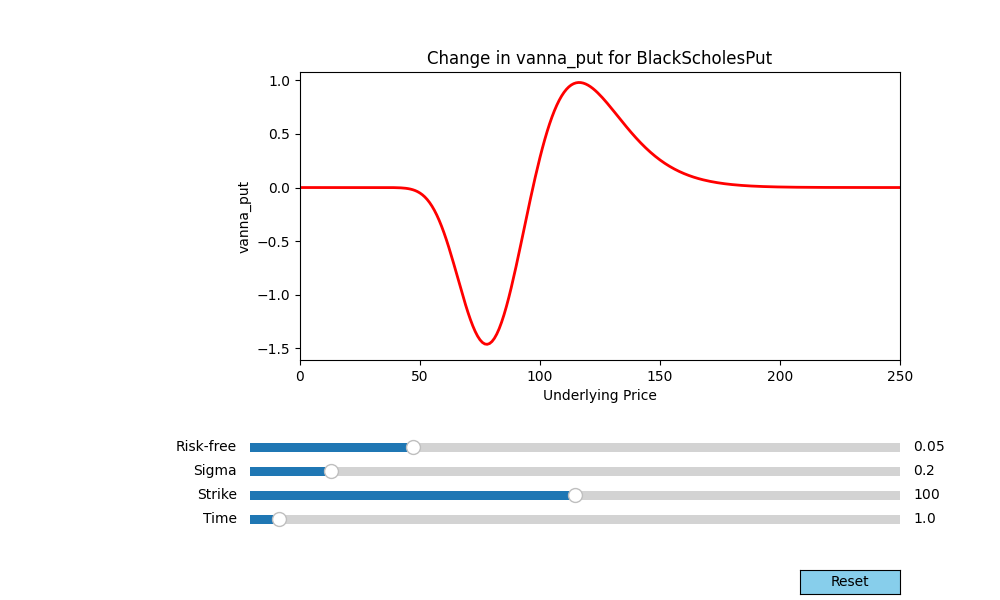

In [38]:
GreekSensitivity(model=BlackScholesPut,greek=vanna_put)

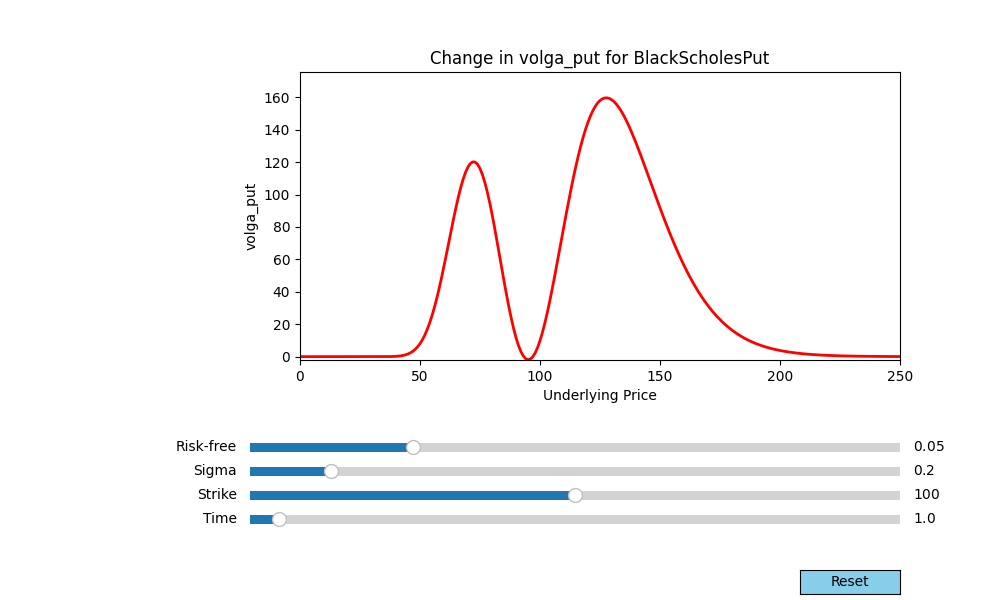

In [39]:
GreekSensitivity(model=BlackScholesPut,greek=volga_put)

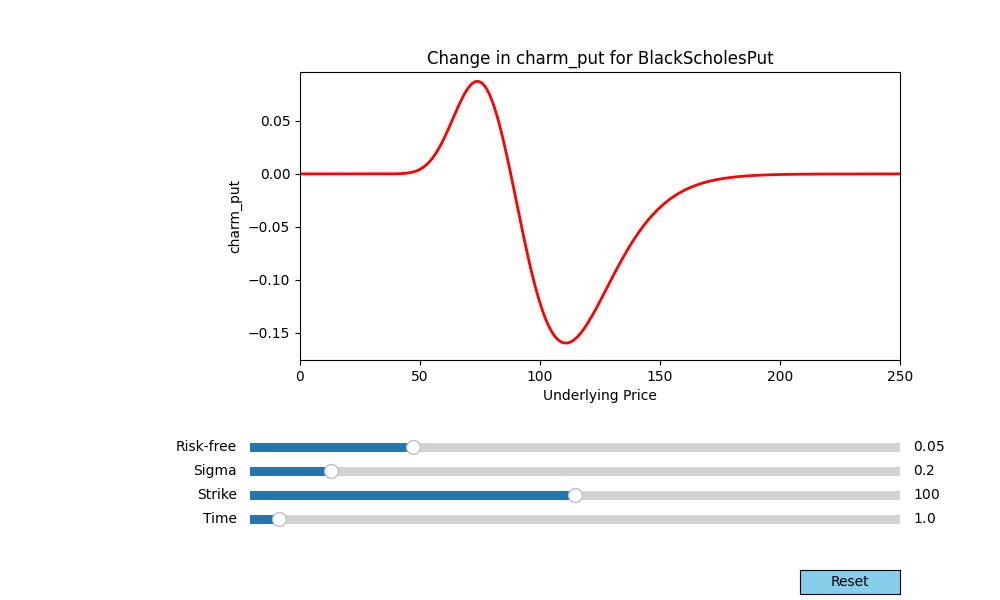

In [40]:
GreekSensitivity(model=BlackScholesPut,greek=charm_put)